In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

/home/dli/anaconda2/envs/dl-jhu-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.018188953399658203


In [4]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=5,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/5
3523/3523 [==============================] - 5s 1ms/step - loss: 0.0032 - val_loss: 7.3250e-04
Epoch 2/5
3523/3523 [==============================] - 4s 1ms/step - loss: 7.7392e-04 - val_loss: 5.5946e-04
Epoch 3/5
3523/3523 [==============================] - 4s 1ms/step - loss: 7.4526e-04 - val_loss: 5.0954e-04
Epoch 4/5
3523/3523 [==============================] - 5s 1ms/step - loss: 6.5143e-04 - val_loss: 5.9695e-04
Epoch 5/5
3523/3523 [==============================] - 4s 1ms/step - loss: 6.2469e-04 - val_loss: 4.8599e-04


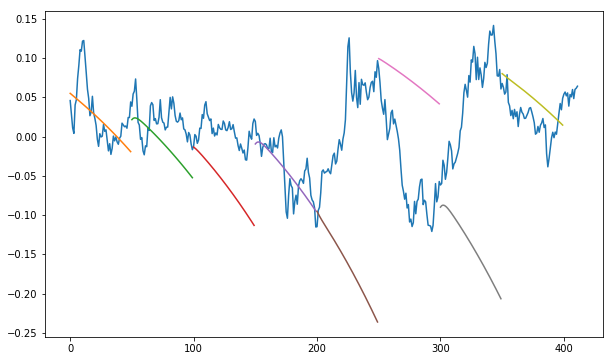

In [5]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)